In [1]:
%matplotlib inline
import matplotlib.pyplot as plt

from __future__ import print_function
from collections import OrderedDict

import os
import sys
import timeit
import pickle

import scipy.io as sio
import numpy as np
import theano
import theano.tensor as T

sys.path.insert(0, "/home/cwhuang/DVTL/Model/")
import nnet as nn
import criteria	as er
import util
import NN

import DataPackage as dp
import AmazonReviewsFeaturePlot as fp

WARNING (theano.sandbox.cuda): CUDA is installed, but device gpu is not available  (error: Unable to get the number of gpus available: invalid argument)


/usr/local/lib/python2.7/dist-packages/numpy/core/fromnumeric.py:2499: VisibleDeprecationWarning: `rank` is deprecated; use the `ndim` attribute or function instead. To find the rank of a matrix see `numpy.linalg.matrix_rank`.
  VisibleDeprecationWarning)


number of minibatch at one epoch: 20, batch size source : 80, target : 80 
 validation size, S:400, T:400, test size, S:4465, T:3586
... building the model
Encoder is constructed with hidden layer number 1
Classifier is constructed with hidden layer number 0
Encoder is constructed with hidden layer number 1
Classifier is constructed with hidden layer number 0
Encoder is constructed with hidden layer number 1
Classifier is constructed with hidden layer number 0
... training
Initial, test accuracy: source domain :50.705487 %, target domain 50.390407 %
epoch 1, minibatch 20/20, training loss 0.602163, validation loss 0.628151 
     epoch 1, minibatch 20/20, test accuracy of best model: source domain :78.521837 %, target domain 77.133296 %
epoch 2, minibatch 20/20, training loss 0.505712, validation loss 0.566858 
     epoch 2, minibatch 20/20, test accuracy of best model: source domain :79.507279 %, target domain 75.432236 %
epoch 3, minibatch 20/20, training loss 0.427622, validation los

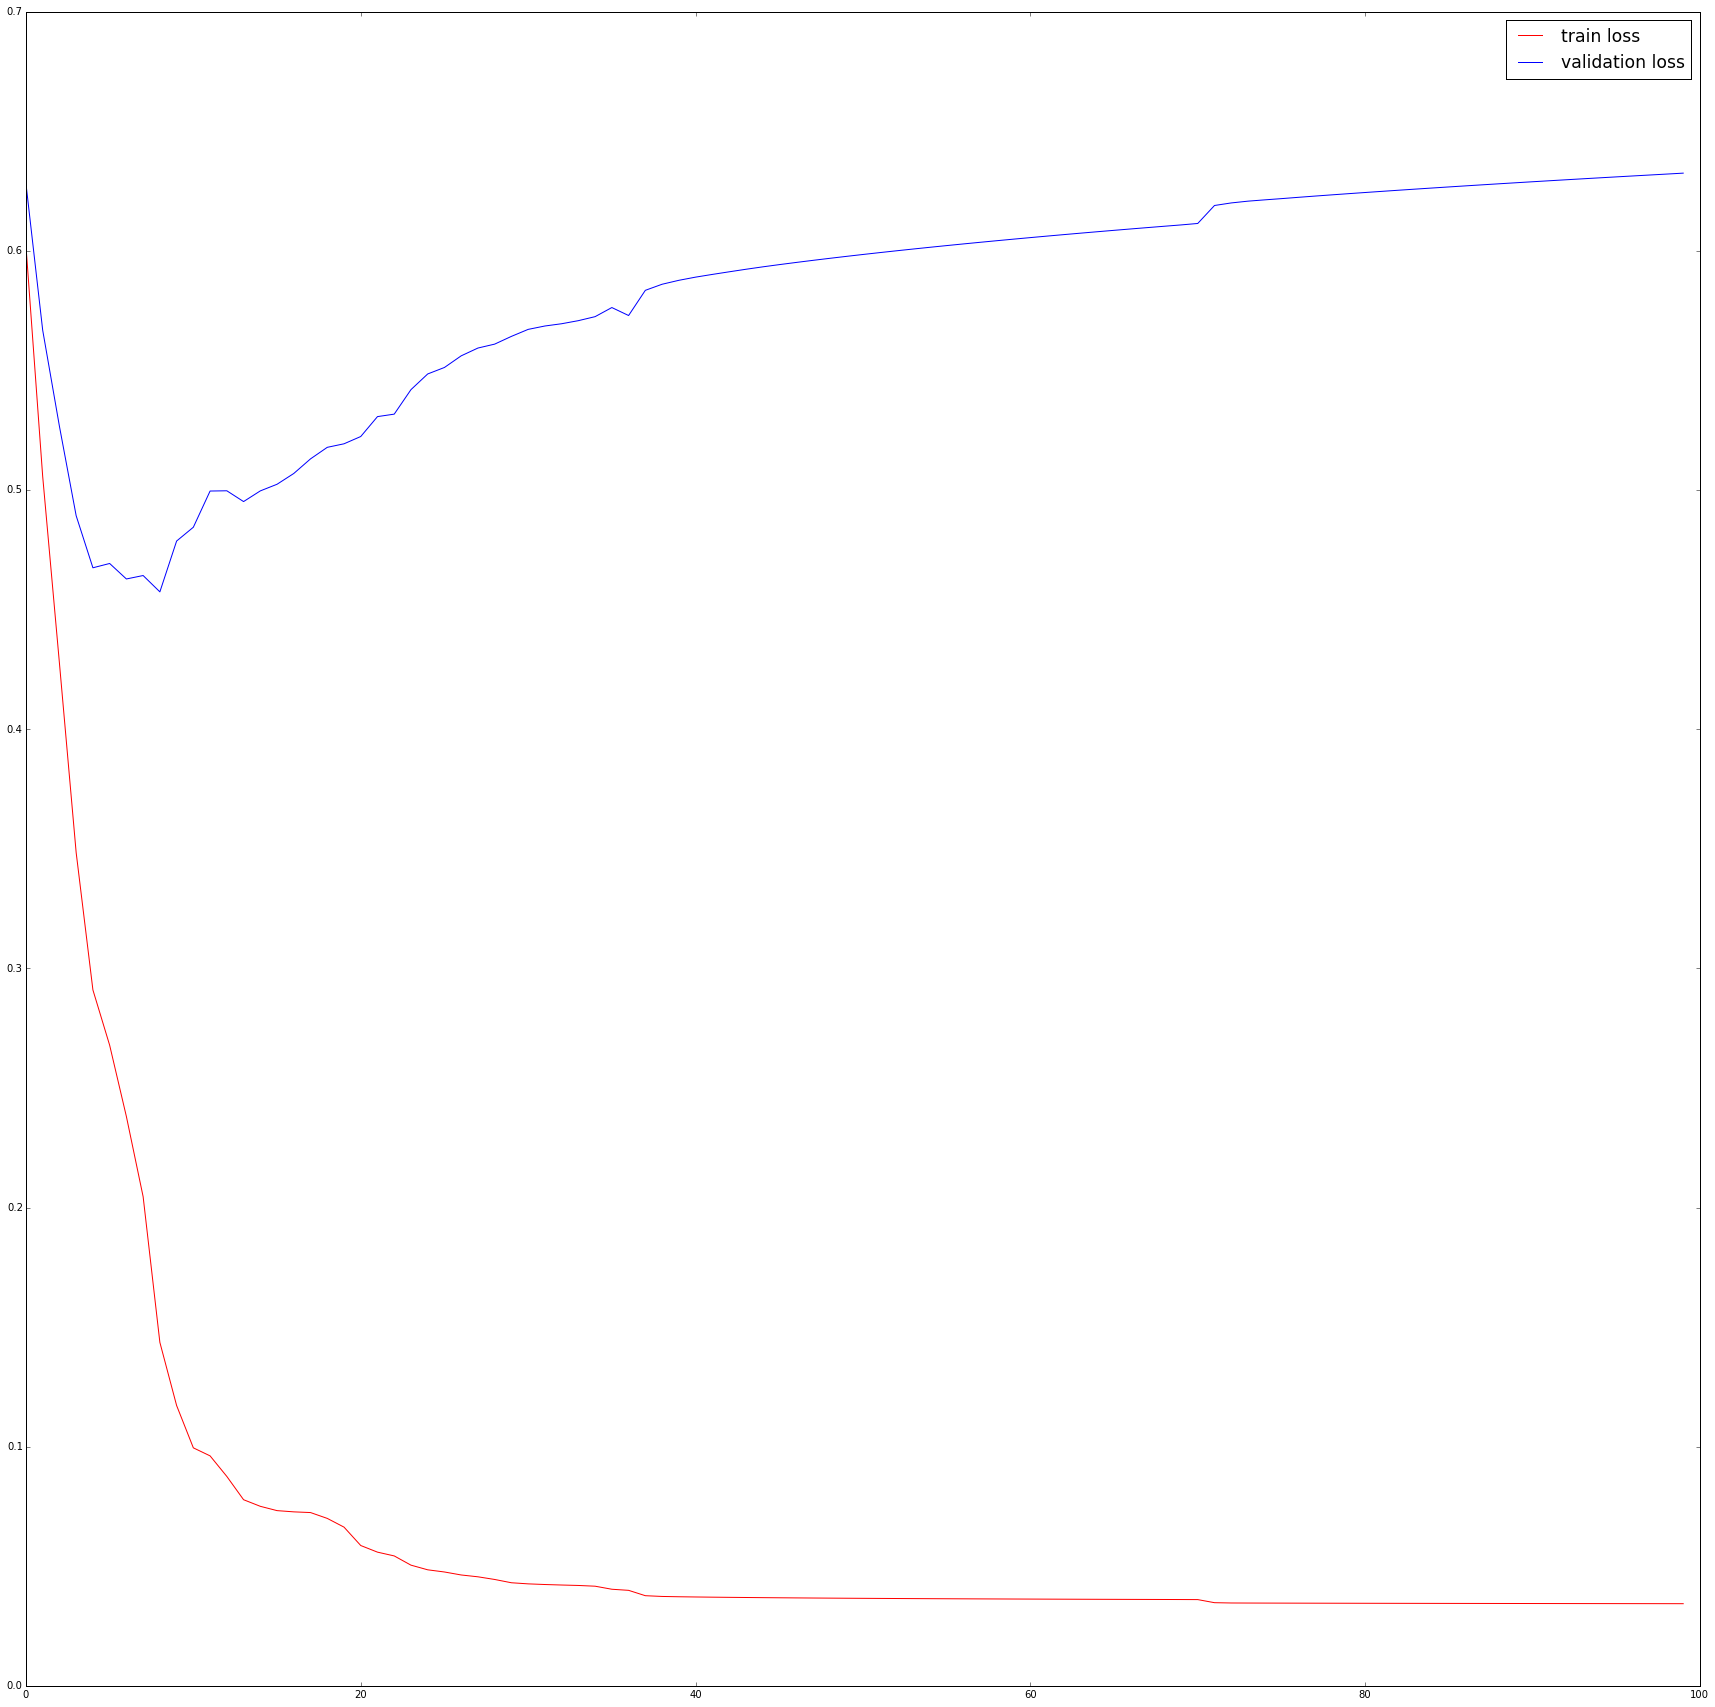

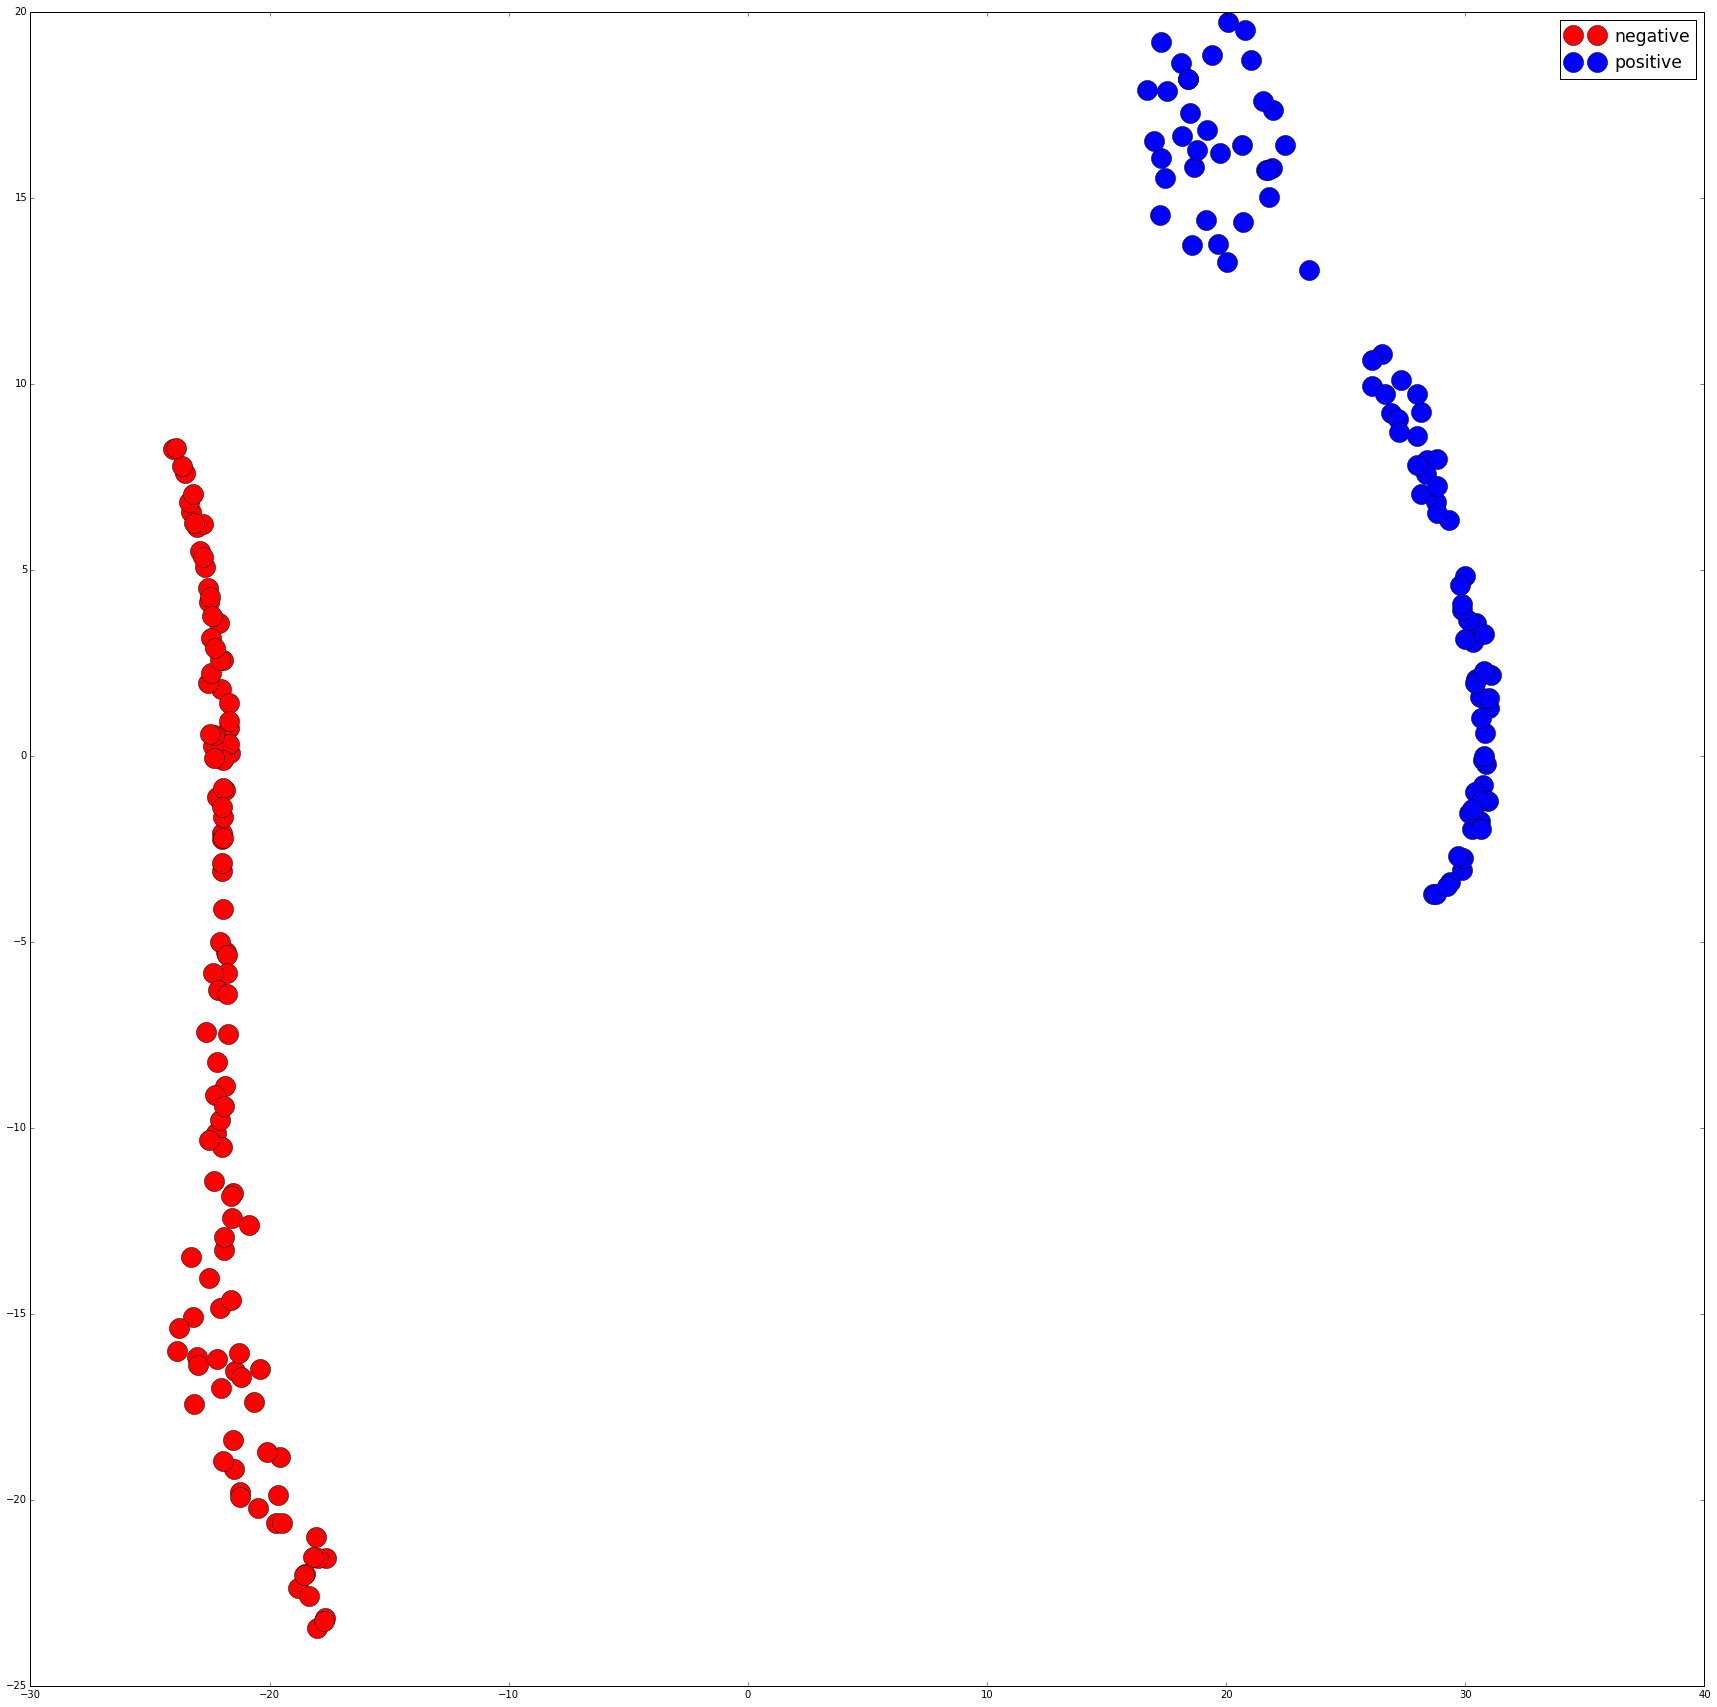

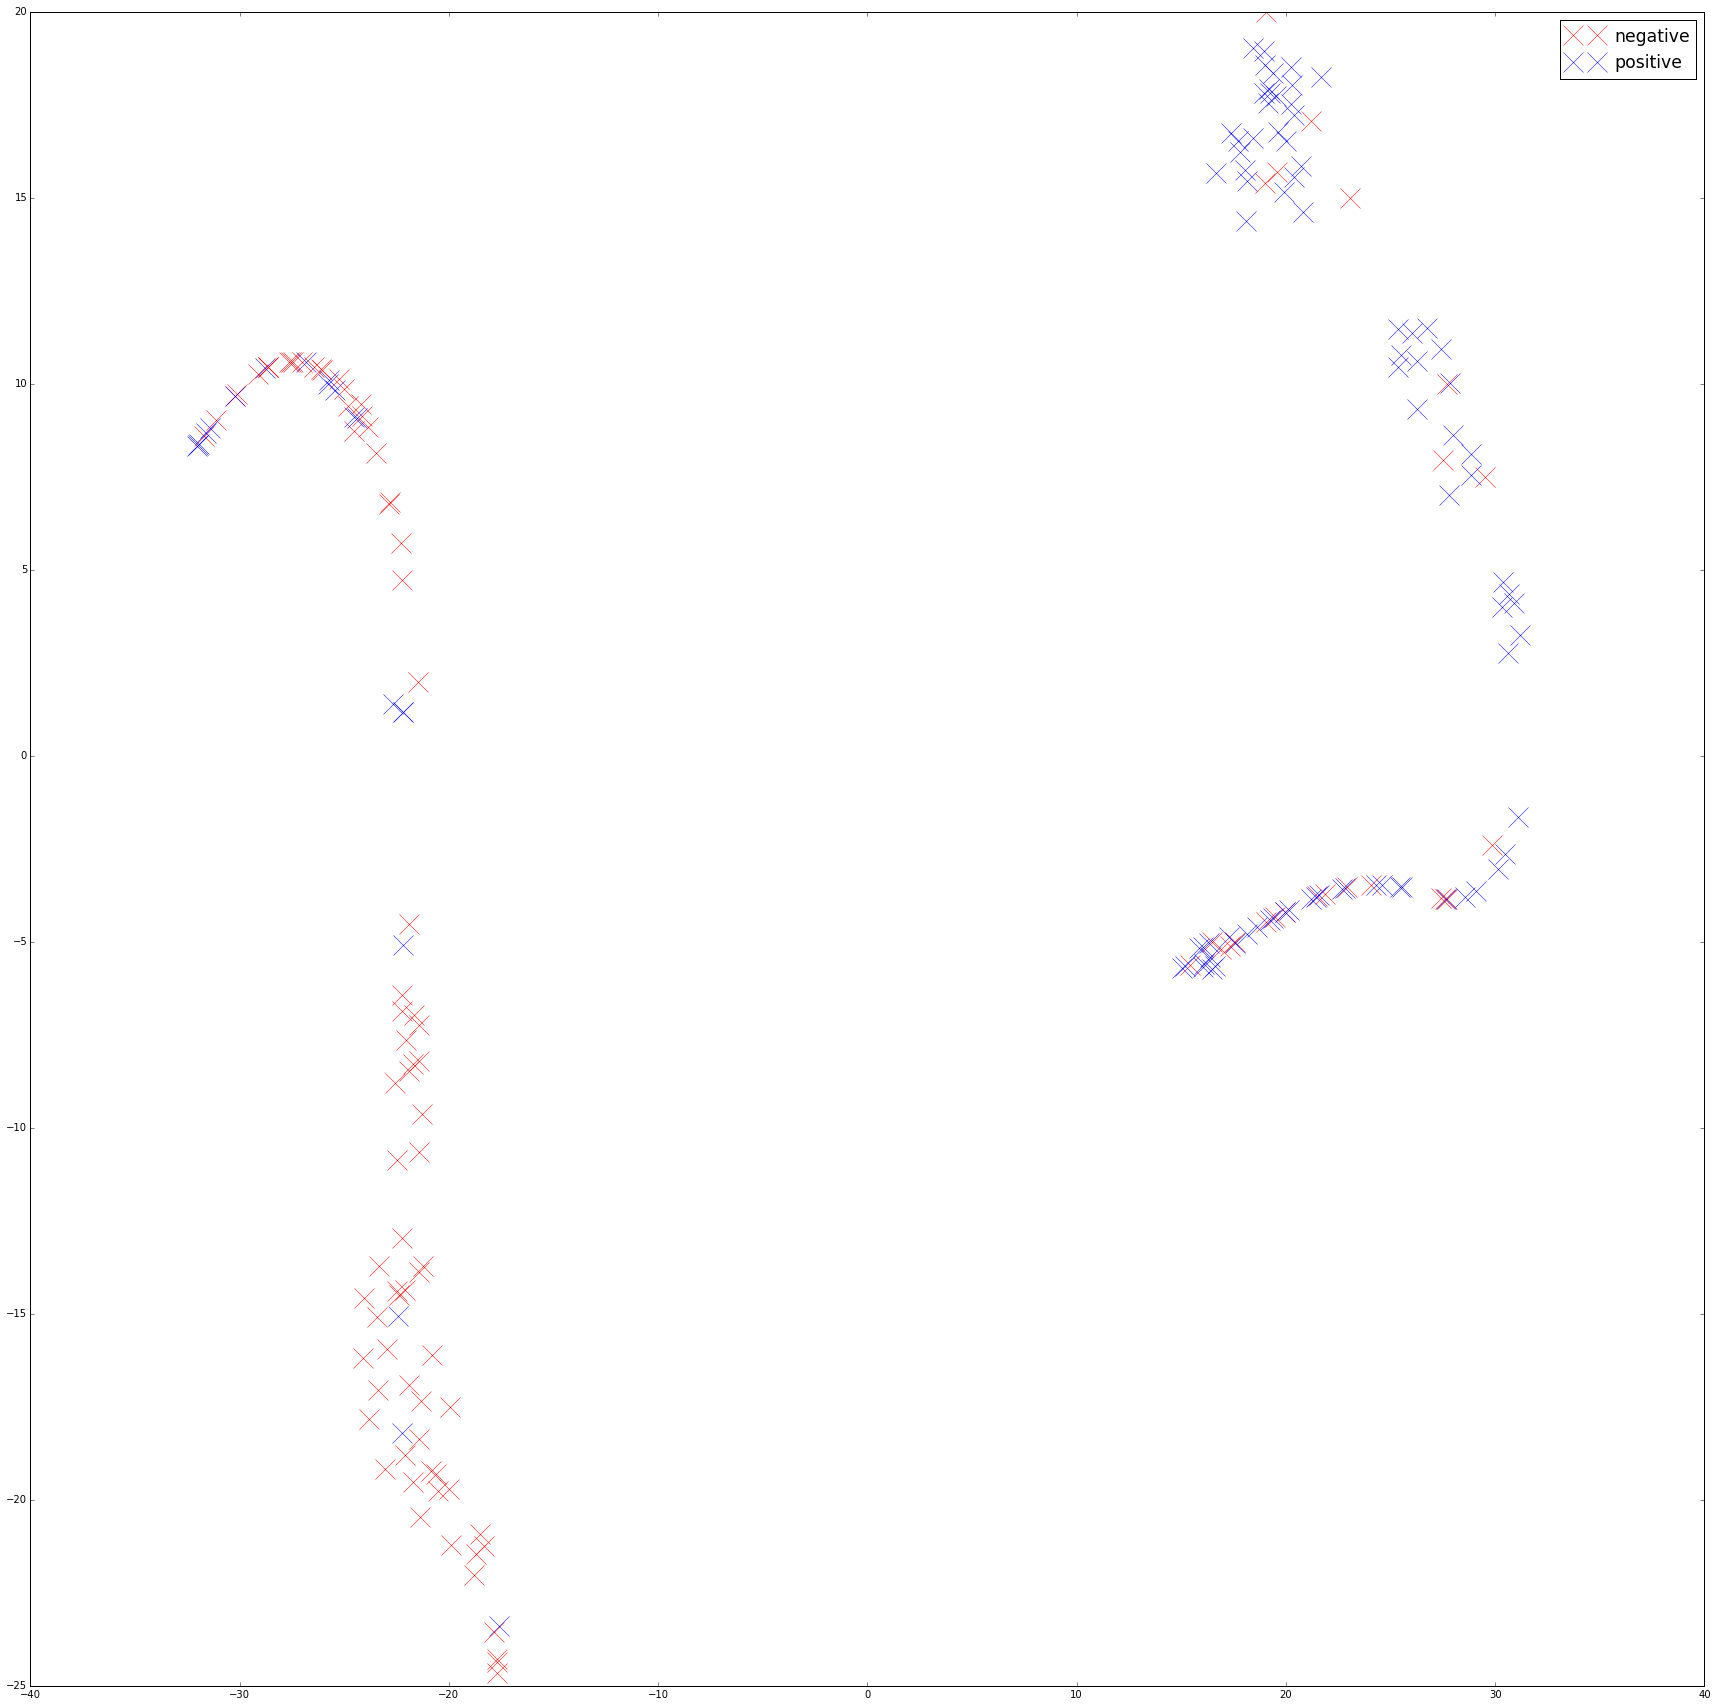

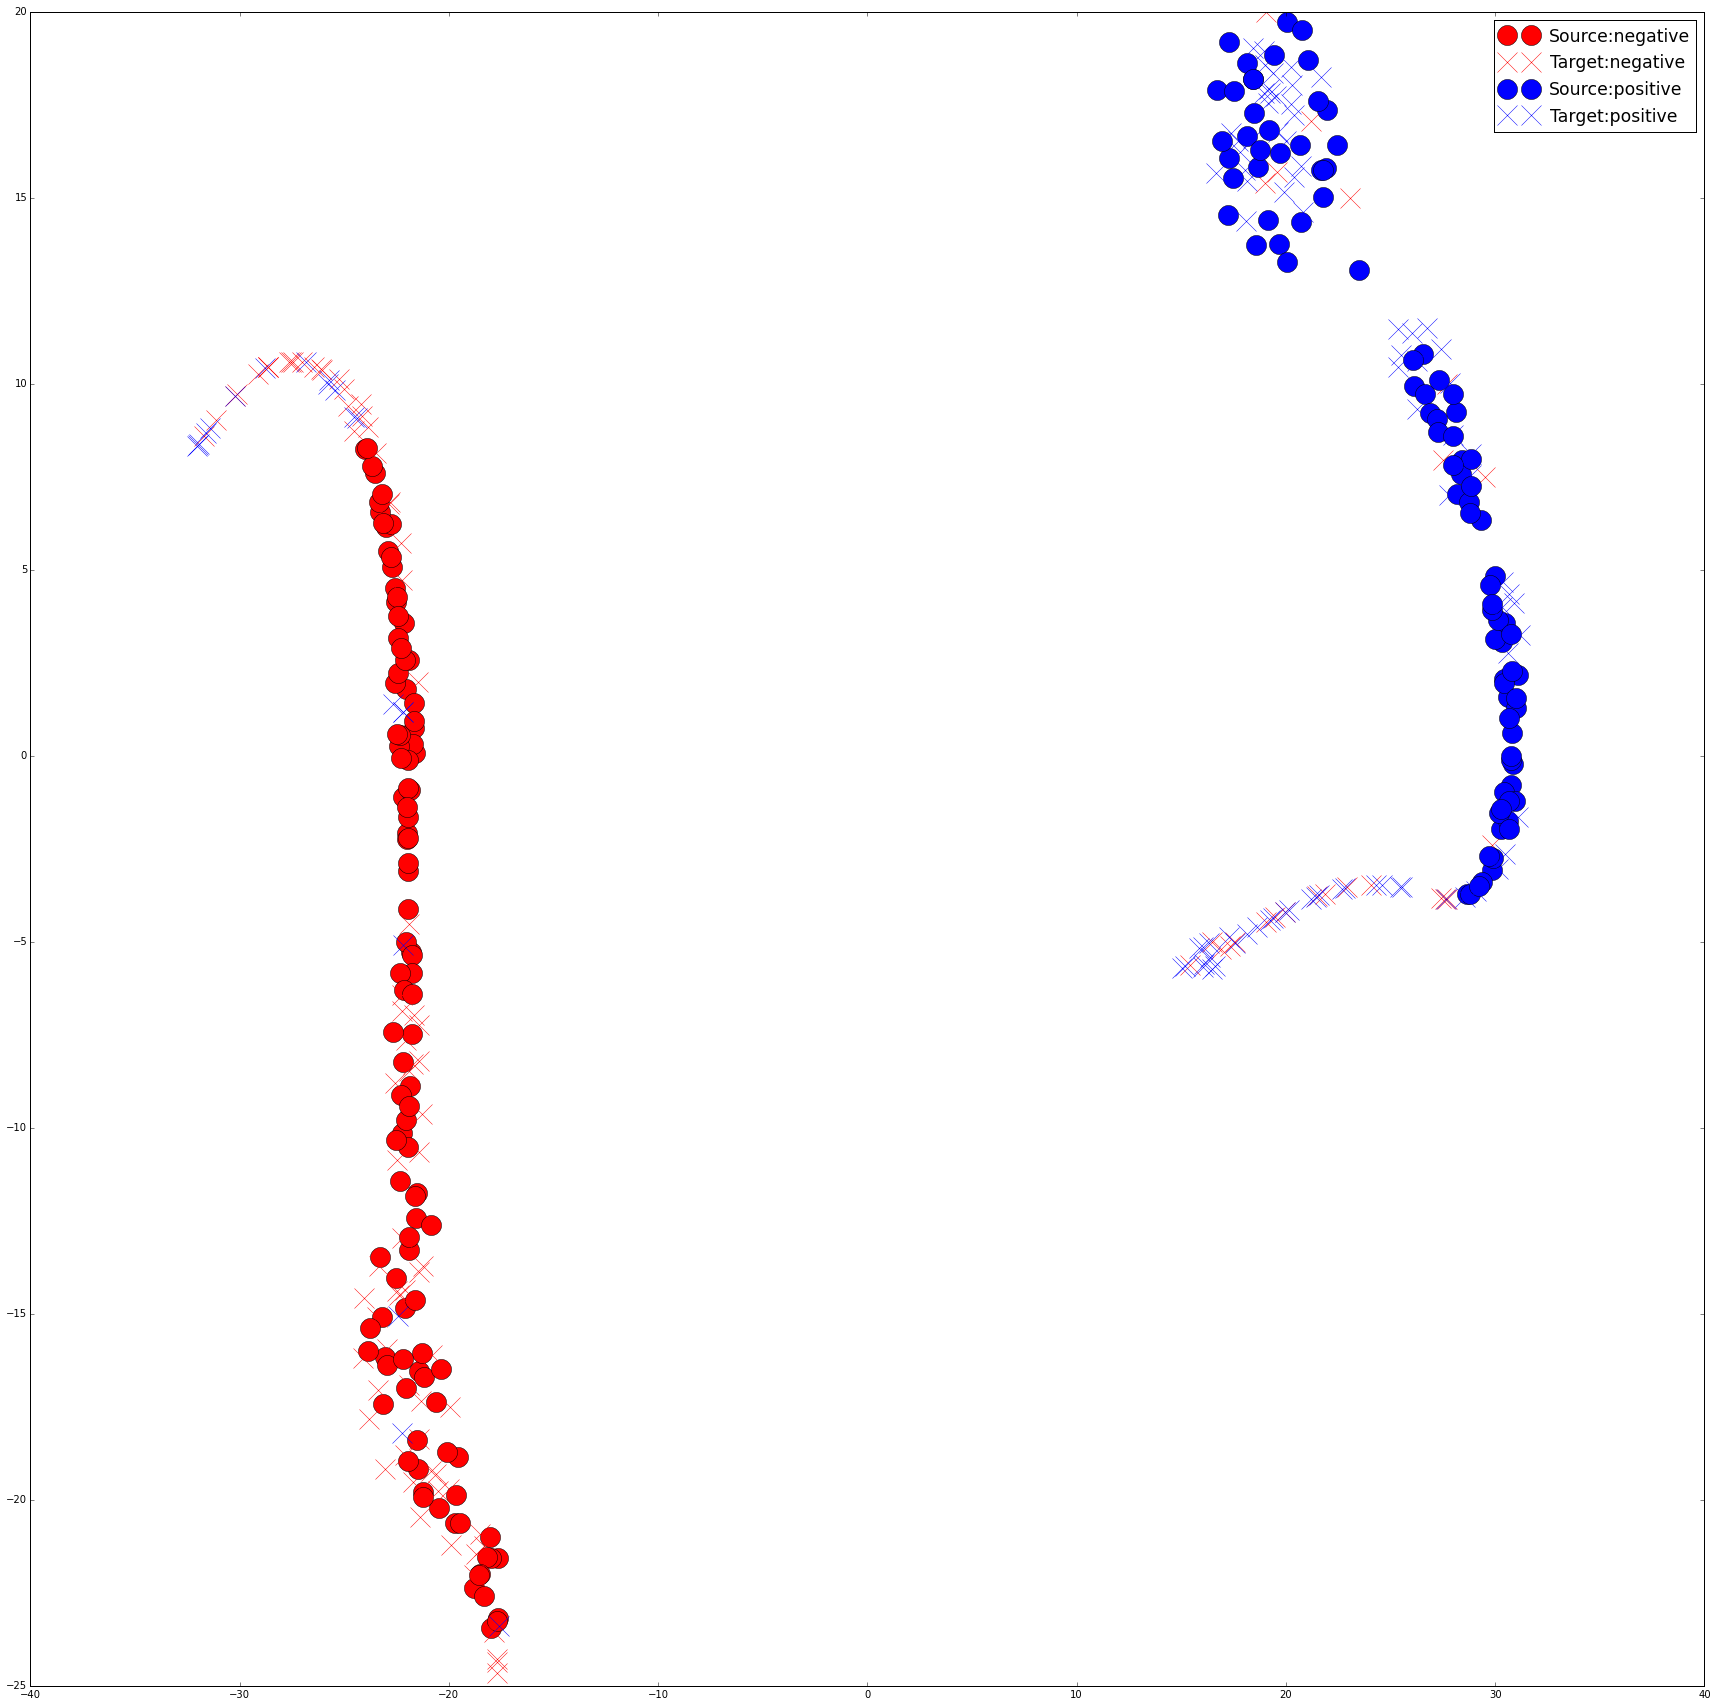

In [2]:
'''Model Construct'''
if __name__ == '__main__':
    
    #books dvd electronics kitchen
    
    max_feature=2000
    source_data, target_data = dp.datapackage(source='books', target='dvd', max_feature=max_feature, tfidf_setting='seperate')
    
    ########################################################################
    ###                        Coefficient Initial                       ###
    ########################################################################         

    x_dim = max_feature
    y_dim = 2
    z_dim = 50                #dimension of latent feature    
    h_dim = 500             #dimension of hidden unit      
    activation = T.nnet.sigmoid
    lr = 0.005

    struct = NN.NN_struct()        
    struct.encoder.layer_dim = [x_dim, h_dim, z_dim]
    struct.encoder.activation = [activation, activation]
    struct.encoder.learning_rate = [lr, lr]
    struct.encoder.decay = [1, 1]                
    struct.classifier.layer_dim = [z_dim, y_dim]
    struct.classifier.activation = [T.nnet.softmax]   
    struct.classifier.learning_rate = [lr, lr]
    struct.classifier.decay = [1, 1]    
            
    coef = NN.NN_coef(        
        beta = 0,
        D = 500,
        optimize = 'Adam_update'        
    )   
    
    isMMD = 'MMD_'
    if coef.beta == 0:
        isMMD = ''                
    description = 'AmazonReviews_mf%i_NN_%s%s' % (max_feature, isMMD, coef.optimize)
        
    features_model, test_model, trained_param = NN.NN_training(
        source_data = source_data,
        target_data = target_data,
        n_train_batches = 20,
        n_epochs=100,
        struct = struct,
        coef = coef,
        description = description
    )    
    
    sample_n = 200
    fp.features_plot(features_model, test_model, source_data, target_data, sample_n, description)    